In [ ]:
import os
import time
from IPython.display import clear_output


# Define dataset paths
dataset_path = r"C:\Users\vikra\OneDrive\Desktop\dataset"
train_real = os.path.join(dataset_path, "train", "real_images")
train_sketch = os.path.join(dataset_path, "train", "sketch_images")
test_real = os.path.join(dataset_path, "test", "real_images")
test_sketch = os.path.join(dataset_path, "test", "sketch_images")

# Check if paths exist
for path in [train_real, train_sketch, test_real, test_sketch]:
    if os.path.exists(path):
        print(f" Folder found: {path}")
        print(f" Files: {os.listdir(path)}\n")
    else:
        print(f" Folder NOT found: {path}\n")


✅ Folder found: C:\Users\vikra\OneDrive\Desktop\dataset\train\real_images
📂 Files: ['f-005-01.jpg', 'f-006-01.jpg', 'f-007-01.jpg', 'f-008-01.jpg', 'f-009-01.jpg', 'f-010-01.jpg', 'f-011-01.jpg', 'f-012-01.jpg', 'f-013-01.jpg', 'f-014-01.jpg', 'f-015-01.jpg', 'f-016-01.jpg', 'f-017-01.jpg', 'f-018-01.jpg', 'f-019-01.jpg', 'f-020-01.jpg', 'f-021-01.jpg', 'f-022-01.jpg', 'f-023-01.jpg', 'f-024-01.jpg', 'f-025-01.jpg', 'f-026-01.jpg', 'f-027-01.jpg', 'f-028-01.jpg', 'f-029-01.jpg', 'f-030-01.jpg', 'f-031-01.jpg', 'f-032-01.jpg', 'f-033-01.jpg', 'f-034-01.jpg', 'f-035-01.jpg', 'f-036-01.jpg', 'f-037-01.jpg', 'f-038-01.jpg', 'f-039-01.jpg', 'f-040-01.jpg', 'f-041-01.jpg', 'f-042-01.jpg', 'f-043-01.jpg', 'f1-001-01.jpg', 'f1-002-01.jpg', 'f1-003-01.jpg', 'f1-004-01.jpg', 'f1-005-01.jpg', 'f1-006-01.jpg', 'f1-007-01.jpg', 'f1-008-01.jpg', 'f1-009-01.jpg', 'f1-010-01.jpg', 'f1-011-01.jpg', 'f1-012-01.jpg', 'f1-013-01.jpg', 'f1-014-01.jpg', 'f1-015-01.jpg', 'm-008-01.jpg', 'm-009-01.jpg', 'm-01

In [ ]:
import cv2
import os

def preprocess_images(input_folder, output_folder):
    if not os.path.exists(input_folder):
        print(f" Skipping {input_folder} (Folder not found)")
        return

    os.makedirs(output_folder, exist_ok=True)  # Create output folder if missing

    for filename in os.listdir(input_folder):
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)

        if img is None:
            print(f" Skipping {filename} (Invalid image file)")
            continue
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        img = cv2.resize(img, (256, 256))  # Resize to 256x256
        cv2.imwrite(os.path.join(output_folder, filename), img)  # Save processed image

# Apply preprocessing
preprocess_images(train_real, os.path.join(dataset_path, "train", "real_processed"))
preprocess_images(train_sketch, os.path.join(dataset_path, "train", "sketch_processed"))
preprocess_images(test_real, os.path.join(dataset_path, "test", "real_processed"))
preprocess_images(test_sketch, os.path.join(dataset_path, "test", "sketch_processed"))

print(" Grayscale conversion completed! Processed images are stored in respective folders.")

✅ Grayscale conversion completed! Processed images are stored in respective folders.


In [ ]:
import os
import shutil

# Define paths
dataset_path = r"C:\Users\vikra\OneDrive\Desktop\dataset"
paths_to_rename = [
    ("train", "real_processed", "A"),
    ("train", "sketch_processed", "B"),
    ("test", "real_processed", "A"),
    ("test", "sketch_processed", "B"),
]

# Rename and move files
for split, old_name, new_name in paths_to_rename:
    old_path = os.path.join(dataset_path, split, old_name)
    new_path = os.path.join(dataset_path, split, new_name)
    
    if os.path.exists(old_path):
        shutil.move(old_path, new_path)
        print(f" Renamed {old_path} → {new_path}")
    else:
        print(f" Folder not found: {old_path}")

print(" Dataset reorganized for Pix2Pix!")

✅ Renamed C:\Users\vikra\OneDrive\Desktop\dataset\train\real_processed → C:\Users\vikra\OneDrive\Desktop\dataset\train\A
✅ Renamed C:\Users\vikra\OneDrive\Desktop\dataset\train\sketch_processed → C:\Users\vikra\OneDrive\Desktop\dataset\train\B
✅ Renamed C:\Users\vikra\OneDrive\Desktop\dataset\test\real_processed → C:\Users\vikra\OneDrive\Desktop\dataset\test\A
✅ Renamed C:\Users\vikra\OneDrive\Desktop\dataset\test\sketch_processed → C:\Users\vikra\OneDrive\Desktop\dataset\test\B
🎉 Dataset reorganized for Pix2Pix!


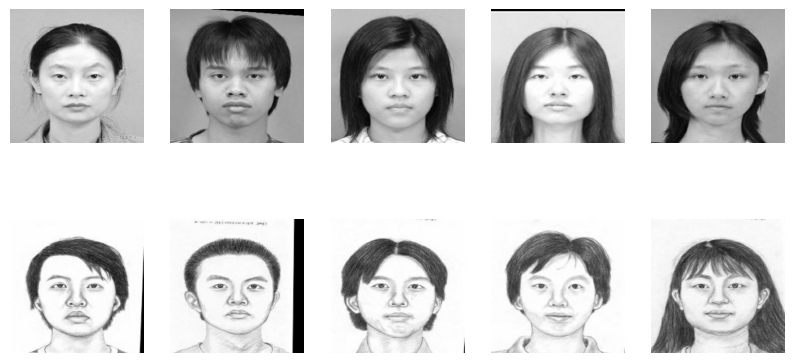

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

IMG_SIZE = 256
BATCH_SIZE = 16

def load_image(image_path):
    """Loads an image and normalizes it to [-1, 1]"""
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = (tf.cast(image, tf.float32) / 127.5) - 1  # Normalize to [-1,1]
    return image

def load_dataset(real_path, sketch_path, batch_size=BATCH_SIZE):
    real_images = [os.path.join(real_path, f) for f in os.listdir(real_path)]
    sketch_images = [os.path.join(sketch_path, f) for f in os.listdir(sketch_path)]
    
    dataset = tf.data.Dataset.from_tensor_slices((real_images, sketch_images))
    dataset = dataset.shuffle(len(real_images))

    def load_and_preprocess(real_path, sketch_path):
        real = load_image(real_path)
        sketch = load_image(sketch_path)
        return real, sketch

    dataset = dataset.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

# Load datasets
train_dataset = load_dataset(os.path.join(dataset_path, "train", "A"),
                             os.path.join(dataset_path, "train", "B"))

# Display sample images
def show_sample(dataset):
    for real, sketch in dataset.take(1):
        plt.figure(figsize=(10, 5))
        for i in range(5):
            plt.subplot(2, 5, i + 1)
            plt.imshow((real[i] + 1) / 2)  # Convert back to [0,1] range for display
            plt.axis("off")
            plt.subplot(2, 5, i + 6)
            plt.imshow((sketch[i] + 1) / 2)
            plt.axis("off")
        plt.show()

show_sample(train_dataset)


In [7]:
import numpy as np
import cv2
import shutil

from tensorflow.keras import layers

def downsample(filters, apply_batchnorm=True):
    """Downsampling layer: Conv2D + BatchNorm + LeakyReLU"""
    result = tf.keras.Sequential()
    result.add(layers.Conv2D(filters, 4, strides=2, padding="same", use_bias=False))
    if apply_batchnorm:
        result.add(layers.BatchNormalization())
    result.add(layers.LeakyReLU())
    return result

def upsample(filters, apply_dropout=False):
    """Upsampling layer: Transposed Conv2D + BatchNorm + Dropout + ReLU"""
    result = tf.keras.Sequential()
    result.add(layers.Conv2DTranspose(filters, 4, strides=2, padding="same", use_bias=False))
    result.add(layers.BatchNormalization())
    if apply_dropout:
        result.add(layers.Dropout(0.5))
    result.add(layers.ReLU())
    return result

def build_generator():
    """Creates U-Net Generator"""
    inputs = layers.Input(shape=[256, 256, 3])
    down_stack = [downsample(64, False), downsample(128), downsample(256), downsample(512)]
    up_stack = [upsample(512, True), upsample(256), upsample(128), upsample(64)]
    last = layers.Conv2DTranspose(3, 4, strides=2, padding="same", activation="tanh")

    x = inputs
    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)

    skips = reversed(skips[:-1])
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = layers.Concatenate()([x, skip])

    x = last(x)
    return tf.keras.Model(inputs=inputs, outputs=x)

generator = build_generator()
generator.summary()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 128, 128,  │      3,072 │ input_layer[0][0] │
│ (Sequential)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_1        │ (None, 64, 64,    │    131,584 │ sequential[0][0]  │
│ (Sequential)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_2        │ (None, 32, 32,    │    525,312 │ sequential_1[0][… │
│ (Sequential)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_3        │ (None, 16, 16,    │  2,099,200 │ sequential_2[0][… │
│ (Sequential)        │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_4        │ (None, 32, 32,    │  4,196,352 │ sequential_3[0][… │
│ (Sequential)        │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 32, 32,    │          0 │ sequential_4[0][… │
│ (Concatenate)       │ 768)              │            │ sequential_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_5        │ (None, 64, 64,    │  3,146,752 │ concatenate[0][0] │
│ (Sequential)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 64, 64,    │          0 │ sequential_5[0][… │
│ (Concatenate)       │ 384)              │            │ sequential_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_6        │ (None, 128, 128,  │    786,944 │ concatenate_1[0]… │
│ (Sequential)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 128, 128,  │          0 │ sequential_6[0][… │
│ (Concatenate)       │ 192)              │            │ sequential[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_4  │ (None, 256, 256,  │      9,219 │ concatenate_2[0]… │
│ (Conv2DTranspose)   │ 3)                │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 10,898,435 (41.57 MB)

 Trainable params: 10,894,851 (41.56 MB)

 Non-trainable params: 3,584 (14.00 KB)

In [8]:
def build_discriminator():
    """Creates PatchGAN discriminator."""
    input_image = layers.Input(shape=[256, 256, 3])
    target_image = layers.Input(shape=[256, 256, 3])
    x = layers.Concatenate()([input_image, target_image])

    x = downsample(64)(x)
    x = downsample(128)(x)
    x = downsample(256)(x)
    x = downsample(512)(x)

    x = layers.Conv2D(1, 4, strides=1, padding="same")(x)
    return tf.keras.Model(inputs=[input_image, target_image], outputs=x)

discriminator = build_discriminator()
discriminator.summary()


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_9       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 256, 256,  │          0 │ input_layer_8[0]… │
│ (Concatenate)       │ 6)                │            │ input_layer_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_8        │ (None, 128, 128,  │      6,400 │ concatenate_3[0]… │
│ (Sequential)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_9        │ (None, 64, 64,    │    131,584 │ sequential_8[0][… │
│ (Sequential)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_10       │ (None, 32, 32,    │    525,312 │ sequential_9[0][… │
│ (Sequential)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_11       │ (None, 16, 16,    │  2,099,200 │ sequential_10[0]… │
│ (Sequential)        │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 16, 16, 1) │      8,193 │ sequential_11[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,770,689 (10.57 MB)

 Trainable params: 2,768,769 (10.56 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [9]:
import tensorflow as tf

loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Generator Loss (L1 + Adversarial Loss)
def generator_loss(disc_generated_output, gen_output, target, lambda_l1=100):
    gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)  # Trick Discriminator
    l1_loss = tf.reduce_mean(tf.abs(target - gen_output))  # L1 Loss (Pixel-wise)
    return gan_loss + (lambda_l1 * l1_loss)  # Total Loss

# Discriminator Loss (Real vs Fake)
def discriminator_loss(disc_real_output, disc_generated_output):
    real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)  # Real = 1
    fake_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)  # Fake = 0
    return (real_loss + fake_loss) * 0.5  # Average Loss

In [10]:
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

checkpoint_dir = "./checkpoints"
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)


In [12]:
# Training step function
@tf.function
def train_step(real_image, sketch_image):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_image = generator(sketch_image, training=True)

        disc_real_output = discriminator([sketch_image, real_image], training=True)
        disc_generated_output = discriminator([sketch_image, generated_image], training=True)

        gen_loss = generator_loss(disc_generated_output, generated_image, real_image)
        disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

    gen_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
    disc_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gen_gradients, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(disc_gradients, discriminator.trainable_variables))

    return gen_loss, disc_loss

In [14]:
import time
from IPython.display import clear_output

EPOCHS = 10

def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        for real_image, sketch_image in dataset:
            gen_loss, disc_loss = train_step(real_image, sketch_image)

        print(f"Epoch {epoch + 1}/{epochs} | Gen Loss: {gen_loss:.4f} | Disc Loss: {disc_loss:.4f}")

        # Save checkpoint every 10 epochs
        if (epoch + 1) % 10 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        print(f"Time for epoch {epoch + 1} is {time.time() - start:.2f} sec")

# Start Training
train(train_dataset, EPOCHS)

Epoch 1/10 | Gen Loss: 27.1007 | Disc Loss: 0.2447
Time for epoch 1 is 57.96 sec
Epoch 2/10 | Gen Loss: 29.1532 | Disc Loss: 0.3198
Time for epoch 2 is 57.57 sec
Epoch 3/10 | Gen Loss: 32.1231 | Disc Loss: 0.5864
Time for epoch 3 is 148.89 sec
Epoch 4/10 | Gen Loss: 30.9015 | Disc Loss: 0.1655
Time for epoch 4 is 58.84 sec
Epoch 5/10 | Gen Loss: 25.8597 | Disc Loss: 0.2193
Time for epoch 5 is 57.81 sec
Epoch 6/10 | Gen Loss: 25.1335 | Disc Loss: 0.8098
Time for epoch 6 is 95.87 sec
Epoch 7/10 | Gen Loss: 32.5778 | Disc Loss: 0.1122
Time for epoch 7 is 57.01 sec
Epoch 8/10 | Gen Loss: 34.3000 | Disc Loss: 0.1139
Time for epoch 8 is 66.38 sec
Epoch 9/10 | Gen Loss: 33.9237 | Disc Loss: 0.2051
Time for epoch 9 is 135.15 sec
Epoch 10/10 | Gen Loss: 35.6609 | Disc Loss: 0.0867
Time for epoch 10 is 51.53 sec


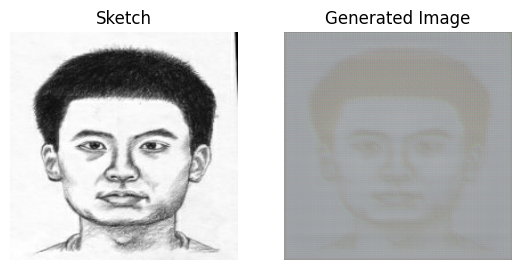

In [19]:
import matplotlib.pyplot as plt

def generate_images(generator, sketch_image):
    prediction = generator(sketch_image, training=False)
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.title("Sketch")
    plt.imshow((sketch_image[0] + 1) / 2)  # Convert to [0,1]
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title("Generated Image")
    plt.imshow((prediction[0] + 1) / 2)
    plt.axis("off")

    plt.show()

# Test on a sample
for real_image, sketch_image in train_dataset.take(1):
    generate_images(generator, sketch_image)


✅ Epoch 1/5 completed.
✅ Epoch 2/5 completed.
✅ Epoch 3/5 completed.
✅ Epoch 4/5 completed.


✅ Epoch 5/5 completed.


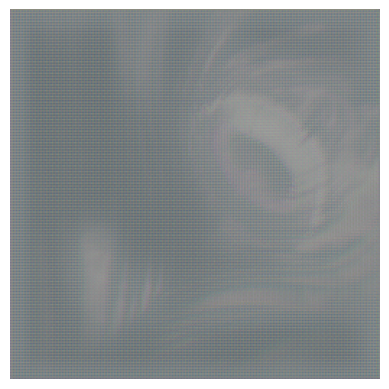

In [6]:
import os
import cv2
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import load_model

# Define dataset paths
dataset_path = r"C:\Users\vikra\OneDrive\Desktop\dataset"
train_real = os.path.join(dataset_path, "train", "real_images")
train_sketch = os.path.join(dataset_path, "train", "sketch_images")

#  Step 1: Preprocess Images (Grayscale & Resize)
def preprocess_images(input_folder, output_folder):
    if not os.path.exists(input_folder):
        print(f"⚠️ Skipping {input_folder} (Folder not found)")
        return
    os.makedirs(output_folder, exist_ok=True)  
    for filename in os.listdir(input_folder):
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)
        if img is None:
            print(f"⚠️ Skipping {filename} (Invalid image file)")
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        img = cv2.resize(img, (256, 256))  # Resize to 256x256
        cv2.imwrite(os.path.join(output_folder, filename), img)

preprocess_images(train_real, os.path.join(dataset_path, "train", "A"))
preprocess_images(train_sketch, os.path.join(dataset_path, "train", "B"))

#  Step 2: Load Dataset
IMG_SIZE = 256
BATCH_SIZE = 16

def load_image(image_path):
    """Load an image and normalize it to [-1, 1]"""
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    return (tf.cast(image, tf.float32) / 127.5) - 1

def load_dataset(real_path, sketch_path, batch_size=BATCH_SIZE):
    real_images = [os.path.join(real_path, f) for f in os.listdir(real_path)]
    sketch_images = [os.path.join(sketch_path, f) for f in os.listdir(sketch_path)]
    dataset = tf.data.Dataset.from_tensor_slices((real_images, sketch_images))
    dataset = dataset.shuffle(len(real_images))

    def load_and_preprocess(real_path, sketch_path):
        real = load_image(real_path)
        sketch = load_image(sketch_path)
        return real, sketch

    dataset = dataset.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    return dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

train_dataset = load_dataset(os.path.join(dataset_path, "train", "A"),
                             os.path.join(dataset_path, "train", "B"))

#  Step 3: Build Generator (U-Net)
def downsample(filters, apply_batchnorm=True):
    """Downsampling layer: Conv2D + BatchNorm + LeakyReLU"""
    result = tf.keras.Sequential()
    result.add(layers.Conv2D(filters, 4, strides=2, padding="same", use_bias=False))
    if apply_batchnorm:
        result.add(layers.BatchNormalization())
    result.add(layers.LeakyReLU())
    return result

def upsample(filters, apply_dropout=False):
    """Upsampling layer: Transposed Conv2D + BatchNorm + Dropout + ReLU"""
    result = tf.keras.Sequential()
    result.add(layers.Conv2DTranspose(filters, 4, strides=2, padding="same", use_bias=False))
    result.add(layers.BatchNormalization())
    if apply_dropout:
        result.add(layers.Dropout(0.5))
    result.add(layers.ReLU())
    return result

def build_generator():
    """Creates U-Net Generator"""
    inputs = layers.Input(shape=[256, 256, 3])
    down_stack = [downsample(64, False), downsample(128), downsample(256), downsample(512)]
    up_stack = [upsample(512, True), upsample(256), upsample(128), upsample(64)]
    last = layers.Conv2DTranspose(3, 4, strides=2, padding="same", activation="tanh")

    x = inputs
    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)

    skips = reversed(skips[:-1])
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = layers.Concatenate()([x, skip])

    x = last(x)
    return tf.keras.Model(inputs=inputs, outputs=x)

generator = build_generator()

#  Step 4: Build Discriminator (PatchGAN)
def build_discriminator():
    """Creates PatchGAN discriminator."""
    input_image = layers.Input(shape=[256, 256, 3])
    target_image = layers.Input(shape=[256, 256, 3])
    x = layers.Concatenate()([input_image, target_image])
    x = downsample(64)(x)
    x = downsample(128)(x)
    x = downsample(256)(x)
    x = downsample(512)(x)
    x = layers.Conv2D(1, 4, strides=1, padding="same")(x)
    return tf.keras.Model(inputs=[input_image, target_image], outputs=x)

discriminator = build_discriminator()

#  Step 5: Define Loss & Optimizers
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def generator_loss(disc_generated_output, gen_output, target, lambda_l1=100):
    gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)
    l1_loss = tf.reduce_mean(tf.abs(target - gen_output))
    return gan_loss + (lambda_l1 * l1_loss)

def discriminator_loss(disc_real_output, disc_generated_output):
    real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)
    fake_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)
    return (real_loss + fake_loss) * 0.5

generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

#  Step 6: Training Step
@tf.function
def train_step(real_image, sketch_image):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_image = generator(sketch_image, training=True)
        disc_real_output = discriminator([sketch_image, real_image], training=True)
        disc_generated_output = discriminator([sketch_image, generated_image], training=True)

        gen_loss = generator_loss(disc_generated_output, generated_image, real_image)
        disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

    gen_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
    disc_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gen_gradients, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(disc_gradients, discriminator.trainable_variables))

    return gen_loss, disc_loss

#  Step 7: Train Model
EPOCHS = 5
for epoch in range(EPOCHS):
    for real_image, sketch_image in train_dataset:
        train_step(real_image, sketch_image)
    print(f"✅ Epoch {epoch + 1}/{EPOCHS} completed.")

#  Step 8: Save Model
generator.save("generator_weights.h5")

#  Step 9: Inference (Generate Image from Sketch)
def generate_image(image_path):
    generator = load_model("generator_weights.h5")
    sketch = load_image(image_path)[None, ...]  
    generated = generator(sketch, training=False)
    plt.imshow((generated[0] + 1) / 2)
    plt.axis("off")
    plt.show()

# Example usage
generate_image(r"C:\Users\vikra\OneDrive\Desktop\dataset\train\real_images\m-045-01.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


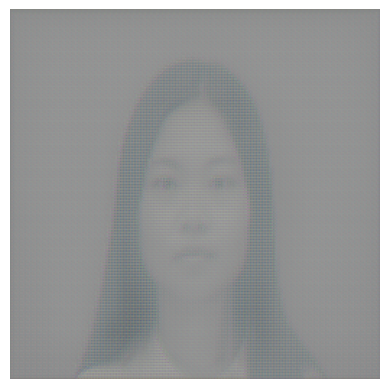

 Output saved as output_generated.jpg


In [7]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

#  Load the trained generator model
generator = load_model("generator_weights.h5")

#  Function to preprocess input sketch image
def preprocess_input(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
    img = cv2.resize(img, (256, 256))  # Resize to 256x256
    img = np.expand_dims(img, axis=-1)  # Add channel dimension
    img = np.repeat(img, 3, axis=-1)  # Convert to 3 channels
    img = (img / 127.5) - 1  # Normalize to [-1, 1]
    return np.expand_dims(img, axis=0)  # Add batch dimension

#  Function to generate an image
def generate_image(image_path, save_output=True):
    sketch = preprocess_input(image_path)  # Preprocess input
    generated_image = generator.predict(sketch)[0]  # Get model output

    #  Convert back to image format
    generated_image = (generated_image + 1) / 2  # Normalize to [0, 1]
    generated_image = (generated_image * 255).astype(np.uint8)  # Convert to 0-255

    #  Display the output
    plt.imshow(generated_image)
    plt.axis("off")
    plt.show()

    #  Save the output image
    if save_output:
        output_path = "output_generated.jpg"
        cv2.imwrite(output_path, cv2.cvtColor(generated_image, cv2.COLOR_RGB2BGR))
        print(f" Output saved as {output_path}")

#  Upload an image and generate output
image_path = r"C:\Users\vikra\OneDrive\Desktop\archive\photo\f1-001-01.jpg"  # Replace with your sketch image path
generate_image(image_path)


In [9]:
import os
import json
import torch
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

# Load BLIP Model
device = "cuda" if torch.cuda.is_available() else "cpu"
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to(device)

# Path to your image dataset
image_folder = r"C:\Users\vikra\OneDrive\Desktop\images"
output_json = "descriptions.json"
descriptions = {}

# Generate captions
for image_name in os.listdir(image_folder):
    image_path = os.path.join(image_folder, image_name)
    
    # Open image
    image = Image.open(image_path).convert("RGB")
    
    # Process image & generate caption
    inputs = processor(images=image, return_tensors="pt").to(device)
    caption_ids = model.generate(**inputs)
    caption = processor.decode(caption_ids[0], skip_special_tokens=True)

    # Store result
    descriptions[image_name] = caption
    print(f"✅ {image_name}: {caption}")

# Save descriptions to JSON
with open(output_json, "w") as f:
    json.dump(descriptions, f, indent=4)

print(f"\n📂 Descriptions saved to {output_json}")


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

c:\Users\vikra\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\vikra\.cache\huggingface\hub\models--Salesforce--blip-image-captioning-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

✅ f1-001-01.jpg: a woman with long hair
✅ f1-002-01.jpg: a woman in a yellow shirt
✅ f1-003-01.jpg: a woman with long hair
✅ f1-004-01.jpg: a woman with long hair
✅ f1-005-01.jpg: a woman with a red shirt
✅ m-046-01.jpg: a man with a red shirt and a blue background
✅ m-047-01.jpg: a man with a white shirt and a white shirt
✅ m-048-01.jpg: a man with a white shirt and brown tie
✅ m-049-01.jpg: a man with a white shirt and a black shirt
✅ m-050-01.jpg: a man with a black shirt and a black shirt

📂 Descriptions saved to descriptions.json


In [11]:
import clip
import torch

# Load CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model, preprocess = clip.load("ViT-B/32", device=device)

def get_clip_embedding(text):
    """Convert text description into a CLIP embedding"""
    text_tokens = clip.tokenize([text]).to(device)
    with torch.no_grad():
        text_embedding = clip_model.encode_text(text_tokens).cpu().numpy()
    return text_embedding.squeeze()


100%|███████████████████████████████████████| 338M/338M [00:35<00:00, 10.1MiB/s]


In [19]:
import os
import json
import tensorflow as tf
import torch
import clip
from PIL import Image

# Load CLIP Model
device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model, clip_preprocess = clip.load("ViT-B/32", device=device)

# Load text descriptions
with open("descriptions.json", "r") as f:
    text_data = json.load(f)

# Function to convert text descriptions to embeddings using CLIP
def get_clip_embedding(text):
    text_tokens = clip.tokenize([text]).to(device)
    with torch.no_grad():
        text_embedding = clip_model.encode_text(text_tokens)
    return text_embedding.cpu().numpy().flatten()  # Convert to NumPy array

# Load dataset
def load_dataset(sketch_path, batch_size=16):
    sketch_images = sorted(os.listdir(sketch_path))

    def load_and_preprocess(sketch_name):
        sketch_name = sketch_name.numpy().decode("utf-8")  # ✅ Convert Tensor to string
        sketch_path_full = os.path.join(sketch_path, sketch_name)

        # Load sketch image
        sketch = tf.io.read_file(sketch_path_full)
        sketch = tf.image.decode_jpeg(sketch, channels=1)  # Convert to grayscale
        sketch = tf.image.resize(sketch, [256, 256])  # Resize
        sketch = (tf.cast(sketch, tf.float32) / 127.5) - 1  # Normalize

        # Load text embedding
        if sketch_name in text_data:
            text_embedding = get_clip_embedding(text_data[sketch_name])
        else:
            text_embedding = tf.zeros(512)  # Handle missing text embeddings

        return text_embedding, sketch

    dataset = tf.data.Dataset.from_tensor_slices(sketch_images)
    dataset = dataset.map(lambda s: tf.py_function(
        func=load_and_preprocess, inp=[s], Tout=[tf.float32, tf.float32]
    ), num_parallel_calls=tf.data.AUTOTUNE)

    return dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Run dataset loading
train_dataset = load_dataset(r"C:\Users\vikra\OneDrive\Desktop\images")

In [20]:
from tensorflow.keras import layers

def build_generator():
    """Creates a Generator that takes Text Embeddings and generates Sketches"""
    text_input = layers.Input(shape=[512])  # CLIP embedding size

    # Expand to match image dimensions
    x = layers.Dense(16 * 16 * 256, activation="relu")(text_input)
    x = layers.Reshape((16, 16, 256))(x)

    # Upsample to 256x256
    x = layers.Conv2DTranspose(128, 4, strides=2, padding="same", activation="relu")(x)
    x = layers.Conv2DTranspose(64, 4, strides=2, padding="same", activation="relu")(x)
    x = layers.Conv2DTranspose(32, 4, strides=2, padding="same", activation="relu")(x)
    x = layers.Conv2DTranspose(1, 4, strides=2, padding="same", activation="tanh")(x)  # Output is grayscale sketch

    return tf.keras.Model(inputs=text_input, outputs=x)

generator = build_generator()


In [21]:
def build_discriminator():
    """Creates a PatchGAN discriminator that evaluates sketches"""
    input_image = layers.Input(shape=[256, 256, 1])

    x = layers.Conv2D(64, 4, strides=2, padding="same")(input_image)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(128, 4, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(256, 4, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(1, 4, strides=1, padding="same")(x)

    return tf.keras.Model(inputs=input_image, outputs=x)

discriminator = build_discriminator()


In [22]:
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def generator_loss(disc_generated_output, gen_output):
    gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)
    return gan_loss

def discriminator_loss(disc_real_output, disc_generated_output):
    real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)
    fake_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)
    return (real_loss + fake_loss) * 0.5

generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)


In [23]:
@tf.function
def train_step(text_embedding, real_sketch):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_sketch = generator(text_embedding, training=True)
        disc_real_output = discriminator(real_sketch, training=True)
        disc_generated_output = discriminator(generated_sketch, training=True)

        gen_loss = generator_loss(disc_generated_output, generated_sketch)
        disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

    gen_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
    disc_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gen_gradients, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(disc_gradients, discriminator.trainable_variables))

    return gen_loss, disc_loss


In [24]:
EPOCHS = 5

for epoch in range(EPOCHS):
    for text_embedding, real_sketch in train_dataset:
        train_step(text_embedding, real_sketch)
    print(f"✅ Epoch {epoch + 1}/{EPOCHS} completed.")

generator.save("text_to_sketch_generator.h5")


✅ Epoch 1/5 completed.
✅ Epoch 2/5 completed.
✅ Epoch 3/5 completed.
✅ Epoch 4/5 completed.


✅ Epoch 5/5 completed.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


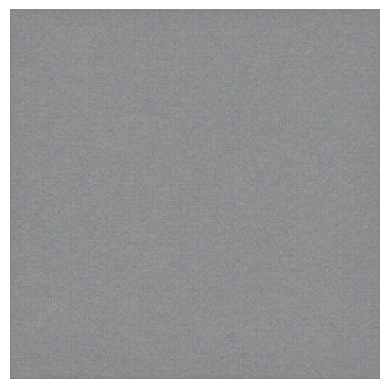

In [2]:
import numpy as np
import torch
import clip
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load trained generator
generator = load_model("generator_weights.h5")

# Load CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model, clip_preprocess = clip.load("ViT-B/32", device=device)

# Function to generate a sketch from text
def generate_sketch_from_text(text_prompt):
    text_tokens = clip.tokenize([text_prompt]).to(device)
    with torch.no_grad():
        text_embedding = clip_model.encode_text(text_tokens).cpu().numpy()  # Convert to NumPy

    # 🚨 Temporary Fix: Use a noise image instead of text embedding
    noise_input = np.random.rand(1, 256, 256, 3).astype(np.float32) * 2 - 1  # Random image

    generated_sketch = generator.predict(noise_input)[0]  # Generate sketch

    generated_sketch = ((generated_sketch + 1) * 127.5).astype(np.uint8)  # Convert back to 0-255
    plt.imshow(generated_sketch, cmap="gray")
    plt.axis("off")
    plt.show()

# Example usage:
generate_sketch_from_text("A man with short hair")
